### EDA Dataset 3

In [1]:
import sys
from pathlib import Path
import os

root = Path.cwd()
while root != root.parent and not (root / "pyproject.toml").exists():
    root = root.parent

sys.path.insert(0, str(root))
sys.path.insert(0, str(root / "src"))

os.chdir(root)

In [ ]:
from __future__ import annotations
import numpy as np
import pandas as pd

# reusing the loader to access the data
from data_loader import load_dataset

# paths to dataset 3
TRAIN_X = "data/TrainData3.txt"
TRAIN_Y = "data/TrainLabel3.txt"
TEST_X = "data/TestData3.txt"

# the missing value given in the assignment
MISSING_VALUE = 1.0e99

## Loading the Dataset

In [3]:
x_train, y_train, x_test = load_dataset(TRAIN_X, TRAIN_Y, TEST_X)
x_train.shape, y_train.shape, x_test.shape

((2547, 112), (2547,), (1092, 112))

## Label distribution

1    288
2    275
3    270
4    292
5    278
6    287
7    289
8    298
9    270
Name: count, dtype: int64


<Axes: >

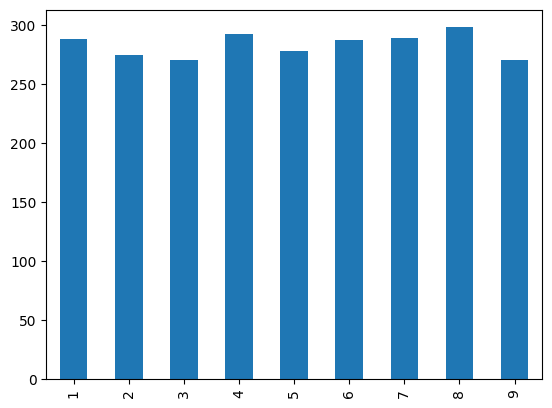

In [4]:
import pandas as pd
dfy3 = pd.Series(y_train)
print(dfy3.value_counts().sort_index())
dfy3.value_counts().sort_index().plot(kind="bar")

## Feature variance check

In [5]:
dfx3 = pd.DataFrame(x_train, columns=[f"f{i+1}" for i in range(x_train.shape[1])])
variances3 = dfx3.var()
print("Zero-variance features:", (variances3==0).sum())
print(variances3.sort_values().head(10))

Zero-variance features: 0
f32    2.322487e-08
f31    2.368086e-08
f30    1.395959e-07
f29    3.305578e-07
f34    5.791347e-07
f33    7.409124e-07
f28    7.735241e-07
f35    8.029840e-07
f36    1.131672e-06
f5     8.635610e-04
dtype: float64


## PCA prview
### Not as important this time around

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

scaler3 = StandardScaler()
x_scaled = scaler3.fit_transform(dfx3.fillna(dfx3.mean()))

pca3 = PCA(n_components=10)
pca3.fit(x_scaled)

print("Explained variance (first 10 PCs):", np.round(pca3.explained_variance_ratio_, 4))
print("Cumulative (10 PCs):", np.round(pca3.explained_variance_ratio_.sum(), 4))

Explained variance (first 10 PCs): [0.1406 0.1263 0.1123 0.0826 0.0478 0.0384 0.0314 0.0275 0.024  0.0206]
Cumulative (10 PCs): 0.6516


## PCA Visual

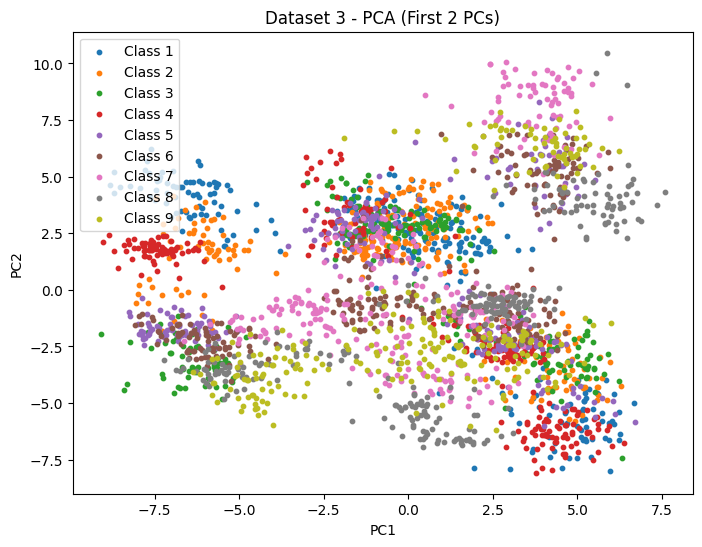

In [8]:
import matplotlib.pyplot as plt

X_pca2 = pca3.transform(x_scaled)[:, :2]

plt.figure(figsize=(8,6))
for c in np.unique(y_train):
    mask = (y_train == c)
    plt.scatter(X_pca2[mask, 0], X_pca2[mask, 1], label=f"Class {c}", s=10)
plt.legend()
plt.title("Dataset 3 - PCA (First 2 PCs)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()